### Close Correlation vs Cumprod Close Relative

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

df1 = yf.download('^HSI', start='2020-01-01', end='2025-01-01', 
                  auto_adjust=True, progress=False).droplevel('Ticker',axis=1)
df2 = yf.download('0005.HK', start='2020-01-01', end='2025-01-01', 
                  auto_adjust=True, progress=False).droplevel('Ticker',axis=1)

# add Price Relative
df1['PrxRel'] = df1.Close/df1.Close.shift(1) 
df2['PrxRel'] = df2.Close/df2.Close.shift(1) #今日口價 除琴日個價，如果升係1.幾，down 0.幾
df1['SimpleRtn'] = df1.Close.pct_change(1)
df2['SimpleRtn'] = df2.Close.pct_change(1)
df1['LogRtn'] = np.log(df1.PrxRel)
df2['LogRtn'] = np.log(df2.PrxRel)
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [2]:
df1.head(2)

Price,Close,High,Low,Open,Volume,PrxRel,SimpleRtn,LogRtn
Date,,,,,,,,
2020-01-03,28451.500000,28883.300781,28428.169922,28828.359375,1797900000,0.996776,-0.003224,-0.003229
2020-01-06,28226.189453,28367.869141,28054.289062,28326.500000,1793400000,0.992081,-0.007919,-0.007951


In [3]:
df2.head(2)

Price,Close,High,Low,Open,Volume,PrxRel,SimpleRtn,LogRtn
Date,,,,,,,,
2020-01-03,46.320908,46.934429,46.205871,46.704359,14419537,0.991790,-0.008210,-0.008244
2020-01-06,46.014137,46.320899,45.860756,46.090826,13809308,0.993377,-0.006623,-0.006645


In [4]:
df1.Close.corr(df2.Close) #value 對 value

-0.6364726287728849

In [5]:
(df1.SimpleRtn+1).cumprod().corr((df2.SimpleRtn+1).cumprod()) # cumporod, cummuative product 乘咗再加

-0.6364726287728854

In [6]:
(df1.SimpleRtn+1).cumprod().corr(df2.Close)  # SimpleRtn+1 : Simple return 今日口價 除琴日個價 

-0.6364726287728862

In [7]:
df1.PrxRel.cumprod().corr(df2.PrxRel.cumprod())

-0.6364726287728854

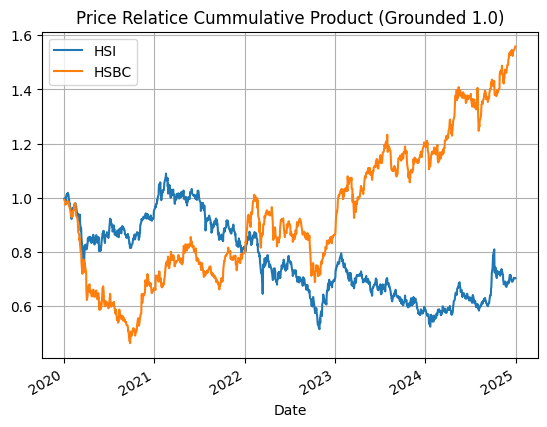

In [8]:
df1['PrxRel'].cumprod().plot(label='HSI')
df2['PrxRel'].cumprod().plot(label='HSBC')
plt.title('Price Relatice Cummulative Product (Grounded 1.0)')
plt.legend()
plt.grid(True)
plt.show()

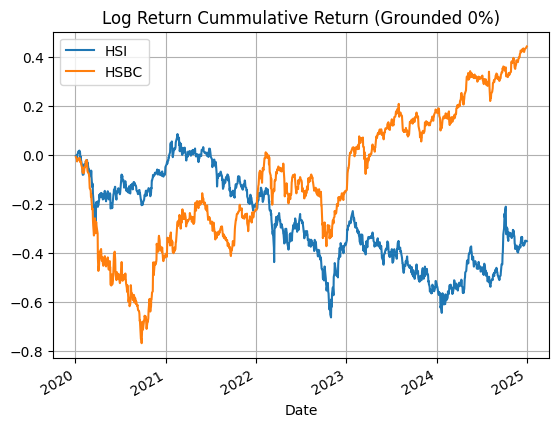

In [9]:
df1['LogRtn'].cumsum().plot(label='HSI')
df2['LogRtn'].cumsum().plot(label='HSBC')
plt.title('Log Return Cummulative Return (Grounded 0%)')
plt.legend()
plt.grid(True)
plt.show()